Working example of the FvCB model of photosynthesis

0. Import important modules

In [1]:
import matplotlib.pyplot as plt
#import Farquhar refers to the farquhar.py file
import Farquhar
import numpy as np

__1. Initialiaze the Model__

    A. Optional inputs of the function: Kc_25, Ko_25, extTp, sim_return
    
    B. While all of them can be changed, I suggest to only ever change 'extTp' and 'sim_return'
    
    C. Default values for extTP = None, the model calculates it based on Vcmax, this can overwrite its value
    
    D. Default for sim_return = 1 to return A. Anything else returns A, Ac, Aj, Ap, Rd

In [2]:
FvCB = Farquhar.FvCB(extTp = 7.1, sim_return = 2)

2. Run default model

In [3]:
FvCB.calcphot()

(12.840351697363614,
 13.740351697363614,
 15.579194042275683,
 21.299999999999997,
 0.9)

3. Run the model in a loop with "np.arange(0,1010)" for CO2 values, to produce a CO2 responce curve

In [4]:
CO2 = np.arange(0, 1010, 10)
Ac = np.zeros(len(CO2))
Aj = np.zeros(len(CO2))
Ap = np.zeros(len(CO2))
A = np.zeros(len(CO2))

for i in range(len(CO2)):
    A[i], Ac[i], Aj[i], Ap[i] = FvCB.calcphot(CO2= CO2[i])[0:4]

4. Plot CO2 responce curve

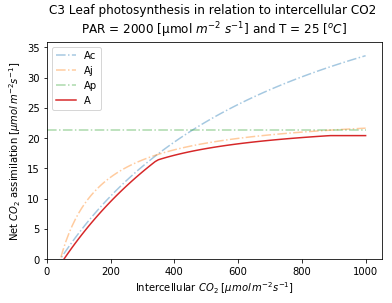

In [5]:
plt.plot(CO2, Ac, '-.', alpha=0.4, label="Ac")
plt.plot(CO2, Aj, '-.', alpha=0.4, label="Aj")
plt.plot(CO2, Ap, '-.', alpha=0.4, label="Ap")
plt.plot(CO2, A, label="A")
plt.title('C3 Leaf photosynthesis in relation to intercellular CO2 \nPAR = 2000 [μmol $m^{-2}$ $s^{-1}$] and T = 25 [$^{o}C$]')
plt.ylabel( r'Net $CO_2$ assimilation $[μmol\, m^{-2} s^{-1}$]')
plt.xlabel(r'Intercellular $CO_2$ $[μmol\, m^{-2} s^{-1}$]')
plt.ylim(ymin = 0)
plt.xlim(xmin = 0)
plt.legend()

The same logic applies to Light responce curve:
    
    5. Run the model in a loop with "np.arange(0,2010)" for PAR values, to produce a Light responce curve

In [6]:
lights = np.arange(0, 2010, 50)
Ac = np.zeros(len(lights))
Aj = np.zeros(len(lights))
Ap = np.zeros(len(lights))
A = np.zeros(len(lights))

for i in range(len(lights)):
    A[i], Ac[i], Aj[i], Ap[i] = FvCB.calcphot(PAR= lights[i])[0:4]

6. Plot Light responce curve

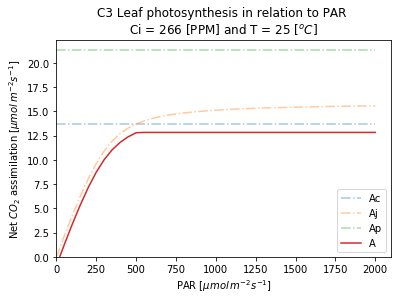

In [7]:
plt.plot(lights, Ac, '-.', alpha=0.4, label="Ac")
plt.plot(lights, Aj, '-.', alpha=0.4, label="Aj")
plt.plot(lights, Ap, '-.', alpha=0.4, label="Ap")
plt.plot(lights, A, label="A")
plt.title('C3 Leaf photosynthesis in relation to PAR \nCi = 266 [PPM] and T = 25 [$^{o}C$]')
plt.ylabel( r'Net $CO_2$ assimilation $[μmol\, m^{-2} s^{-1}$]')
plt.xlabel(r'PAR $[μmol\, m^{-2} s^{-1}$]')
plt.ylim(ymin = 0)
plt.xlim(xmin = 0)
plt.legend()

..